![](https://www.zigya.com/blog/wp-content/uploads/2021/01/dig10.png)

# What is Decision Trees ?

- Decision Trees are a popular machine learning algorithm used for both classification and regression tasks. They are a supervised learning method that builds a model in the form of a tree structure, where each internal node represents a decision based on a feature, each branch represents the outcome of the decision, and each leaf node represents a class label or a predicted value.

- The decision tree algorithm learns from the training data by recursively partitioning the data based on the features, aiming to create homogeneous subsets of data at each internal node. The decision at each node is made based on a specific feature and a threshold value. The goal is to maximize the information gain or minimize the impurity measure at each step.

- In a classification task, decision trees can be used to predict the class label of a sample by traversing the tree from the root to a leaf node. Each internal node represents a decision rule, and each leaf node represents a class label. In a regression task, decision trees can be used to predict a continuous value by assigning the average value of the training samples in each leaf node.

- Decision trees have several advantages, including their interpretability, as the tree structure can be easily visualized and understood. They can handle both categorical and numerical features and can capture complex relationships between variables. However, decision trees are prone to overfitting, especially when the tree depth is not properly controlled. This can be mitigated by using techniques like pruning or ensembling methods such as Random Forest or Gradient Boosting, which combine multiple decision trees to improve performance.

- Overall, decision trees are widely used and versatile machine learning models that provide a clear and intuitive representation of decision-making processes in various domains.

# 1. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Loading the data Set

In [2]:
dataset = pd.read_csv("/kaggle/input/titaniccsv/DecisionTrees_titanic.csv")

In [3]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,38.0,1,0,71.2833,0
1,1,1,0,35.0,1,0,53.1000,2
2,0,1,1,54.0,0,0,51.8625,2
3,1,3,0,4.0,1,1,16.7000,2
4,1,1,0,58.0,0,0,26.5500,2


# 3. Data Splitting and Model Training

In [4]:
y = dataset.loc[:,"Survived"]

In [5]:
X = dataset.drop("Survived", axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 4. Decision Tree Model Training and Prediction

In [7]:
decisiontree = DecisionTreeClassifier()

In [8]:
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
decisiontree_pred = decisiontree.predict(X_test)

# 5. Random Forest Model Training and Prediction

In [10]:
randomforest = RandomForestClassifier()

In [11]:
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
randomforest_pred = randomforest.predict(X_test)

# 6. Classification Reports for Model Predictions

In [13]:
print(classification_report(y_test, decisiontree_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        18
           1       0.86      0.86      0.86        37

    accuracy                           0.82        55
   macro avg       0.79      0.79      0.79        55
weighted avg       0.82      0.82      0.82        55



In [14]:
print(classification_report(y_test, randomforest_pred))

              precision    recall  f1-score   support

           0       0.91      0.56      0.69        18
           1       0.82      0.97      0.89        37

    accuracy                           0.84        55
   macro avg       0.86      0.76      0.79        55
weighted avg       0.85      0.84      0.82        55



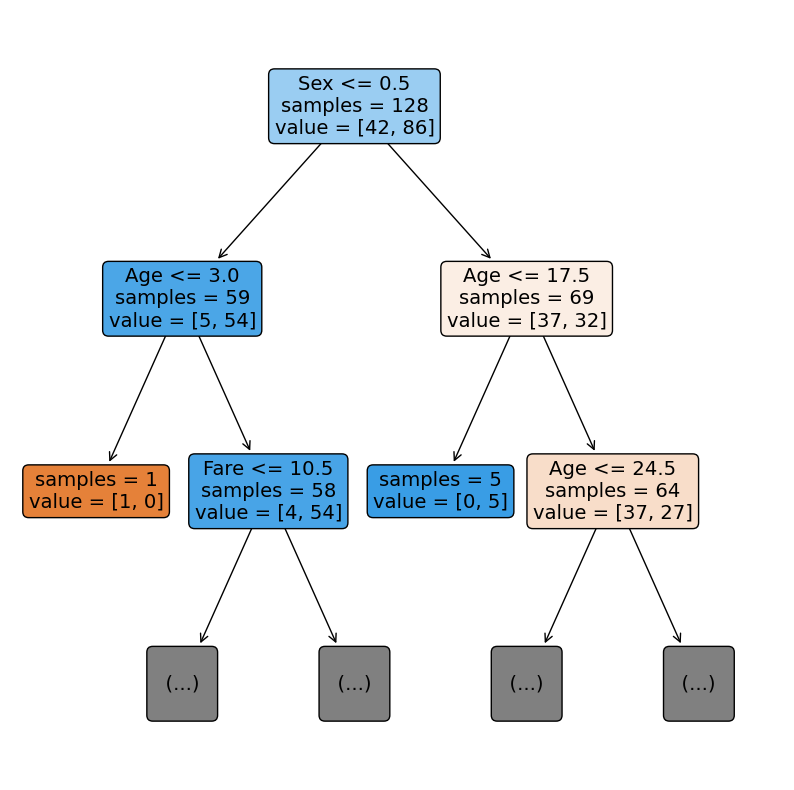

In [15]:
fig = plt.figure(figsize=(10,10))
plot_tree(decisiontree,
          max_depth=2,
          feature_names=X.columns,
          filled=True,
          impurity=False,
          rounded=True,
          precision=1)

plt.show(block=True)